<a href="https://colab.research.google.com/github/raissulaiman/Proyek1_Segmentasi-Pasar-Usaha-Amanie.ipynb/blob/main/Proyek1_Segmentasi_Pasar_Usaha_Amanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. LATAR BELAKANG 

Proyek ini diambil dari topik yang diangkat oleh saya untuk skripsi saya yaitu mengenai segmentasi pasar salah satu usaha mikro di Kota Bogor yang menjual sabun dan cairan pembersih, yaitu Usaha Mikro 'Amanie'. 

Usaha ini baru dijalankan pada awal tahun 2020 dan masih beroperasi sampai sekarang. Karena usaha ini baru, maka diperlukan pemetaan pasar atau segmentasi untuk konsumen usaha ini agar memudahkan usaha untuk mengetahui lebih jelas mengenai karakteristik pasar dan konsumen usaha ini. Data yang digunakan adalah data kuesioner segmentasi pasar yang diambil langsung dari konsumen Amanie.

Sebelumnya pada skripsi saya, pengelolaan dilakukan dengan menggunakan excel dan SPSS dan untuk segmentasi pasar menggunakan two-step clustering. Pada proyek kali ini akan dicoba menggunakan python untuk analisis data dengan metode segmentasi pasar menggunakan unsupervised machine learning dengan K-Modes. 



# Data 
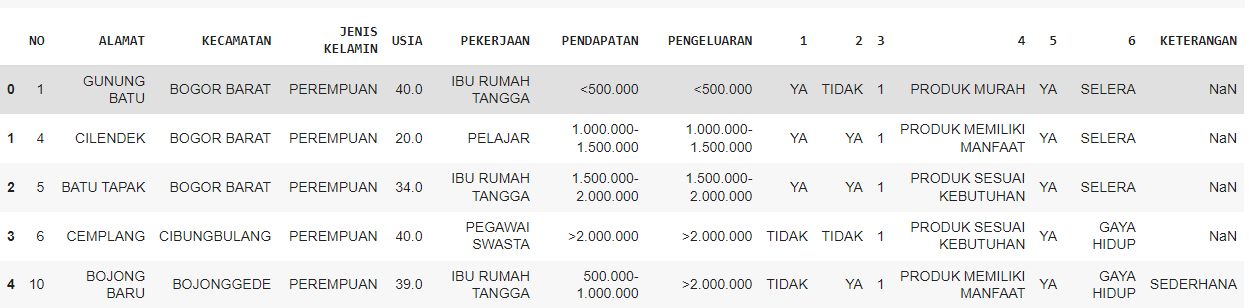

Berikut merupakan data dari kuesioner segmentasi pasar yang telah dilakukan.
Data ini memiliki 15 kolom dengan penjelasan sebagai berikut:


1. Alamat: kolom yang berisi alamat konsumen
2. Kecamatan: kolom yang berisi kecamatan konsumen
3. Jenis Kelamin: jenis kelamin konsumen
4. Usia: usia konsumen
5. Pekerjaan: pekerjaan konsumen
6. Pendapatan: pendatapan konsumen dalam kurung satu bulan 
7. Pengeluaran: pengeluaran konsumen dalam kurung satu bulan.
8. 1: merupakan jawaban dari pertanyaan "Saya membeli produk UMKM AMANIE karena dekat dari tempat tinggal".
9. 2: merupakan jawaban dari pertanyaan "Saya hanya membeli produk sabun dan cairan pembersih hanya dari UMKM AMANIE"
10. 3: merupakan jawaban untuk kuantitas produk 'Amanie' yang dibeli oleh konsumen dalam kurung waktu satu minggu.
11. 4: merupakan jawaban untuk alasan membeli produk amanie
12. 5: merupakan jawaban untuk apakah membeli produk karena kehalalan
13. 6: memilih produk karena GAYA HIDUP/SELERA/KEPRIBADIAN
14. Keterangan: untuk jawaban tambahan



# Persiapan Analisis

Langkah-langkah yang akan dilakukan untuk analisis data:

1. importing data
2. data cleansing dan grouping 
3. klusterisasi




# 2. IMPORTING DATA

Ada beberapa langkah yang diperlukan dalam tahap importing data yaitu import library yang diperlukan dan juga data yang diperlukan. 

In [ ]:
#mengimport library yang diperlukan

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mengimport data yang diperlukan untuk analisis

df = pd.read_csv('rekapan kuesioner skripsi.csv')
df.head()


,NO,ALAMAT,KECAMATAN,JENIS KELAMIN,USIA,PEKERJAAN,PENDAPATAN,PENGELUARAN,1,2,3,4,5,6,KETERANGAN
0,1,GUNUNG BATU,BOGOR BARAT,PEREMPUAN,40.0,IBU RUMAH TANGGA,<500.000,<500.000,YA,TIDAK,1,PRODUK MURAH,YA,SELERA,NaN
1,4,CILENDEK,BOGOR BARAT,PEREMPUAN,20.0,PELAJAR,1.000.000-1.500.000,1.000.000-1.500.000,YA,YA,1,PRODUK MEMILIKI MANFAAT,YA,SELERA,NaN
2,5,BATU TAPAK,BOGOR BARAT,PEREMPUAN,34.0,IBU RUMAH TANGGA,1.500.000-2.000.000,1.500.000-2.000.000,YA,YA,1,PRODUK SESUAI KEBUTUHAN,YA,SELERA,NaN
3,6,CEMPLANG,CIBUNGBULANG,PEREMPUAN,40.0,PEGAWAI SWASTA,>2.000.000,>2.000.000,TIDAK,TIDAK,1,PRODUK SESUAI KEBUTUHAN,YA,GAYA HIDUP,NaN
4,10,BOJONG BARU,BOJONGGEDE,PEREMPUAN,39.0,IBU RUMAH TANGGA,500.000-1.000.000,>2.000.000,TIDAK,YA,1,PRODUK MEMILIKI MANFAAT,YA,GAYA HIDUP,SEDERHANA


In [ ]:
#melihat deskripsi data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NO             186 non-null    int64  
 1   ALAMAT         186 non-null    object 
 2   KECAMATAN      186 non-null    object 
 3   JENIS KELAMIN  186 non-null    object 
 4   USIA           185 non-null    float64
 5   PEKERJAAN      186 non-null    object 
 6   PENDAPATAN     182 non-null    object 
 7   PENGELUARAN    182 non-null    object 
 8   1              186 non-null    object 
 9   2              186 non-null    object 
 10  3              186 non-null    object 
 11  4              186 non-null    object 
 12  5              185 non-null    object 
 13  6              171 non-null    object 
 14  KETERANGAN     38 non-null     object 
dtypes: float64(1), int64(1), object(13)
memory usage: 21.9+ KB


# 3. DATA CLEANSING DAN GROUPING
Setelah mengetahui data yang akan digunakan, kemudian langkah berikutnya adalah data cleansing dan grouping.

Tidak semua kolom digunakan untuk model kluster, oleh karena itu dipilih beberapa kolom saja. Untuk data ini, akan didrop kolom 'NO', 'ALAMAT', '5', dan 'KETERANGAN'. Untuk alamat konsumen akan digunakan kecamatan saja untuk mempermudah proses permodelan, kolom '5' dihapus karena semua menjawab 'YA' untuk memilih produk yang halal, dan juga kolom 'KETERANGAN' karena tidak semua responden mengisi jadi lebih baik dihapus. 

In [ ]:
# mengetahui masing-masing nama kolom
df.columns

Index(['NO', 'ALAMAT', 'KECAMATAN', 'JENIS KELAMIN', 'USIA', 'PEKERJAAN',
       'PENDAPATAN', 'PENGELUARAN', '1', '2', '3', '4', '5', '6',
       'KETERANGAN '],
      dtype='object')

In [ ]:
# menghapus kolom 'NO', 'ALAMAT', '5' dan 'KETERANGAN'

df = df.drop(columns=['NO', 'ALAMAT','5','KETERANGAN '])

Setelah menghapus kolom yang tidak diperlukan, kemudian mencari tahu apakah ada data yang kosong atau hilang. Karena semua data adalah data kategorikal, maka jika ada data yang kosong dapat dihapus saja untuk satu baris yang berisi data yang kosong. 

In [ ]:
#mengetahui data yang kosong dari masing-masing kolom
df.isna().sum()

KECAMATAN         0
JENIS KELAMIN     0
USIA              1
PEKERJAAN         0
PENDAPATAN        4
PENGELUARAN       4
1                 0
2                 0
3                 0
4                 0
6                15
dtype: int64

In [ ]:
# menghapus data yang kosong 
df.dropna(inplace=True)

In [ ]:
#mengecek ulang data
df.isna().sum()

KECAMATAN        0
JENIS KELAMIN    0
USIA             0
PEKERJAAN        0
PENDAPATAN       0
PENGELUARAN      0
1                0
2                0
3                0
4                0
6                0
dtype: int64

# Data Grouping

Setelah proses data cleansing selesai, langkah selanjutnya adalah mengrouping beberapa data. yaitu data usia dan data alamat kecamatan.

untuk data usia, untuk memudahkan permodelan, maka akan dilakukan perubahan data usia yang berupa data kategori menjadi data interval/variabel. 

untuk data kecamatan, beberapa kecamatan akan dikelompokkan berdasarkan letak kedekatan dengan kecamatan bogor barat yang dimana merupakan letak dari usaha 'Amanie'.

Berikut merupakan tabel untuk pengelompokkan data kecamatan 

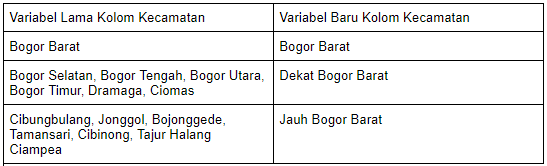

In [ ]:
# mengubah data usia dari data kategorikal menjadi data inteval/variabel

df['USIA'] = pd.cut(df['USIA'], [0, 20, 30, 40, 50, 60, 70, 80, 90], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90'])

In [ ]:
# data kecamatan dalam kolom 'KECAMATAN'

df['KECAMATAN'].value_counts()

BOGOR BARAT      80
CIOMAS           32
BOGOR SELATAN    20
BOGOR TENGAH     13
BOGOR UTARA       4
CIBUNGBULANG      3
DRAMAGA           3
BOGOR TIMUR       3
JONGGOL           2
BOJONGGEDE        2
TAMANSARI         1
TAJUR HALANG      1
CIAMPEA           1
CIBINONG          1
Name: KECAMATAN, dtype: int64

In [ ]:
# mengelompokkan data kecamatan 

df['KECAMATAN']=(df['KECAMATAN'].replace(['BOGOR SELATAN','BOGOR TENGAH', 'BOGOR UTARA', 'BOGOR TIMUR', 'DRAMAGA', 'CIOMAS'], 
                                         'DEKAT BOGOR BARAT')
                                .replace(['CIBUNGBULANG','JONGGOL','BOJONGGEDE','TAMANSARI','CIBINONG','TAJUR HALANG', 'CIAMPEA'],
                                         'JAUH BOGOR BARAT'))

In [ ]:
# melihat data setelah dilakukan cleansing dan grouping 
print(df.head())

          KECAMATAN JENIS KELAMIN  ...                        4           6
0       BOGOR BARAT     PEREMPUAN  ...             PRODUK MURAH      SELERA
1       BOGOR BARAT     PEREMPUAN  ...  PRODUK MEMILIKI MANFAAT      SELERA
2       BOGOR BARAT     PEREMPUAN  ...  PRODUK SESUAI KEBUTUHAN      SELERA
3  JAUH BOGOR BARAT     PEREMPUAN  ...  PRODUK SESUAI KEBUTUHAN  GAYA HIDUP
4  JAUH BOGOR BARAT     PEREMPUAN  ...  PRODUK MEMILIKI MANFAAT  GAYA HIDUP

[5 rows x 11 columns]


# Data Visualisasi

Kemudian membuat visualisasi data untuk mempermudah melihat data.

<Figure size 432x288 with 0 Axes>

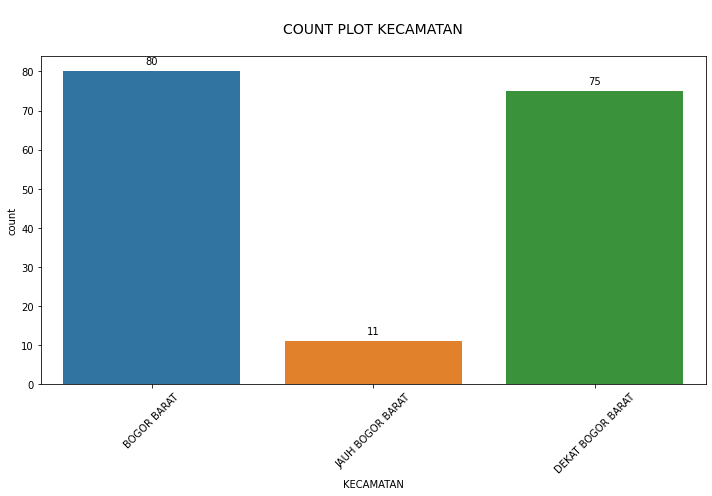

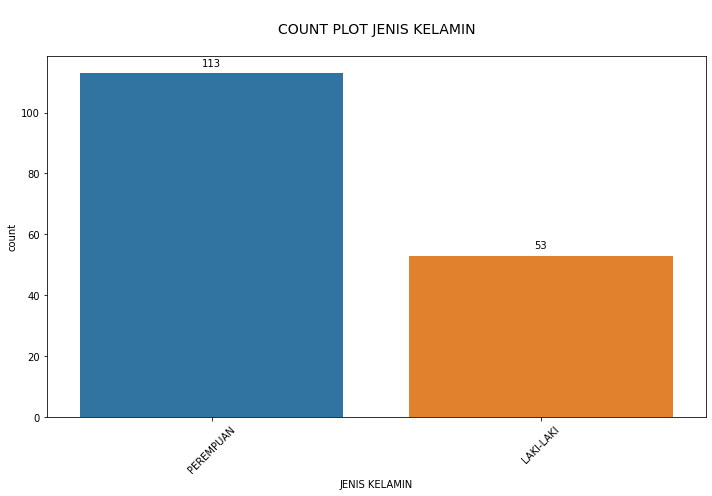

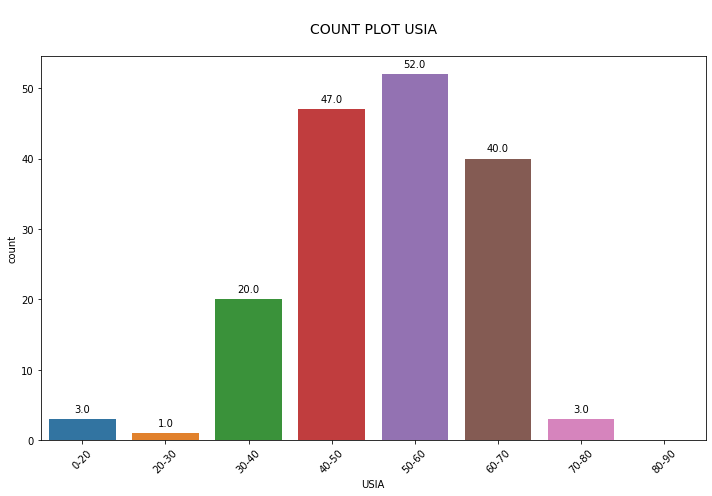

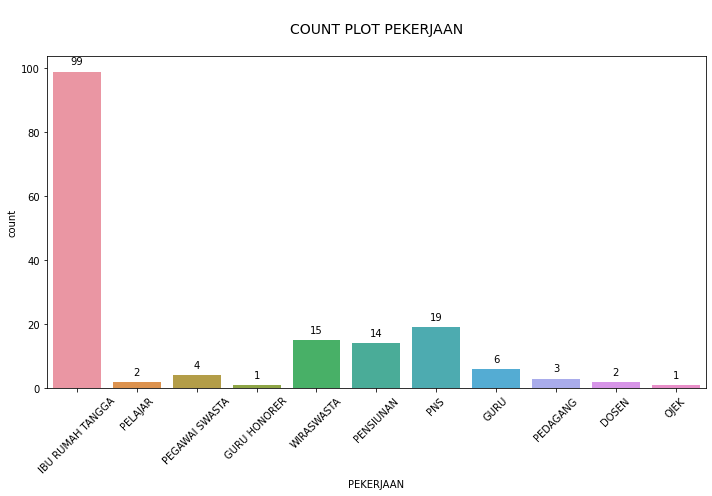

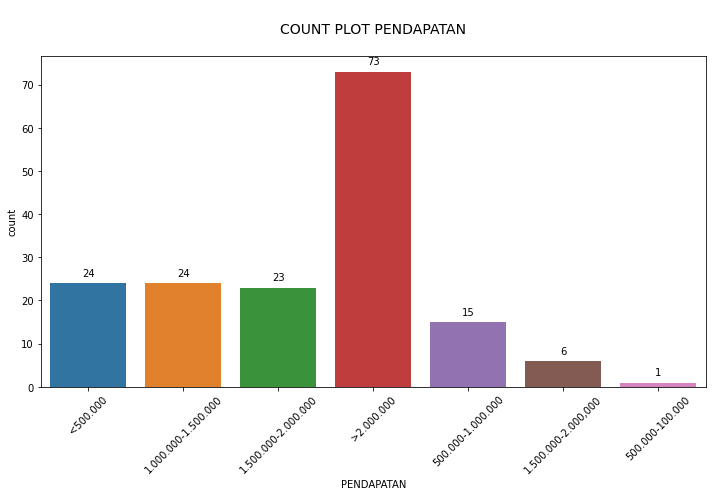

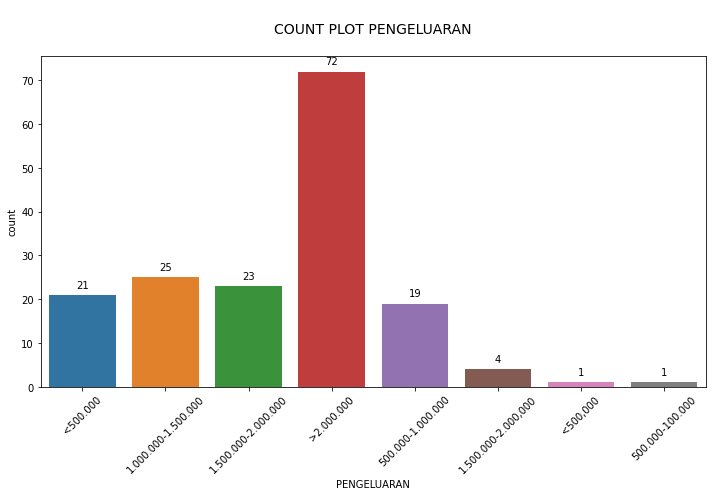

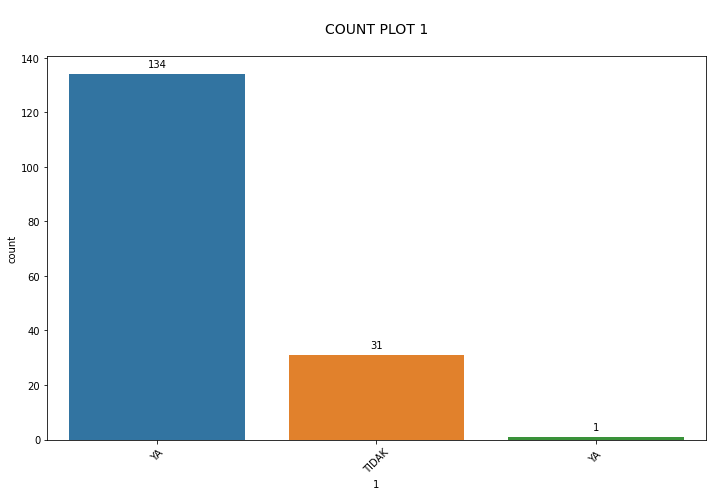

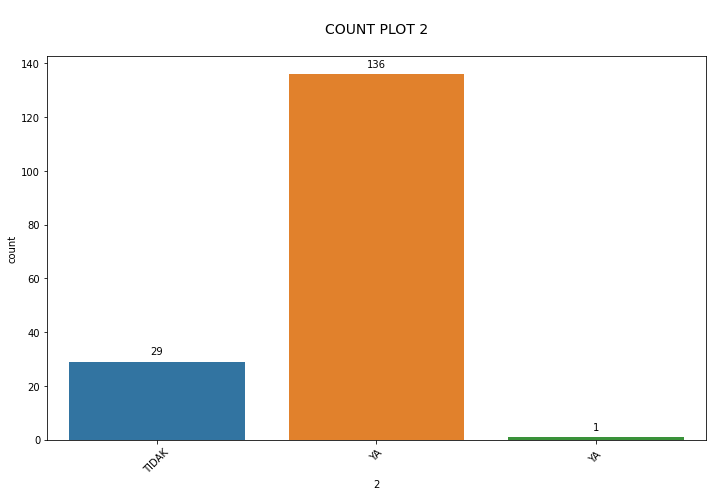

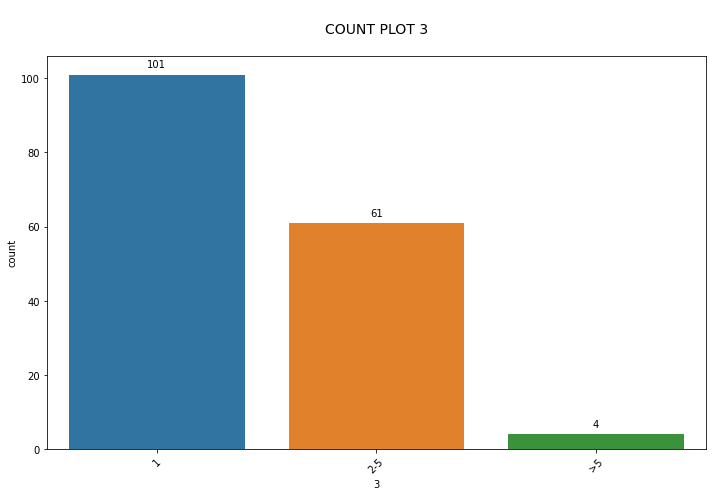

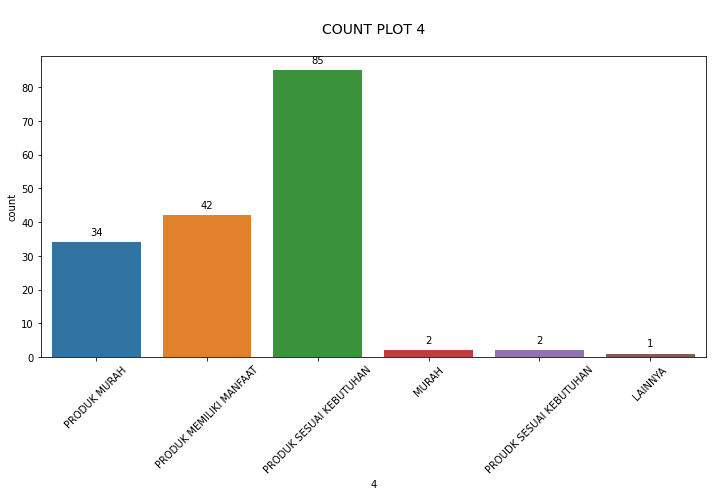

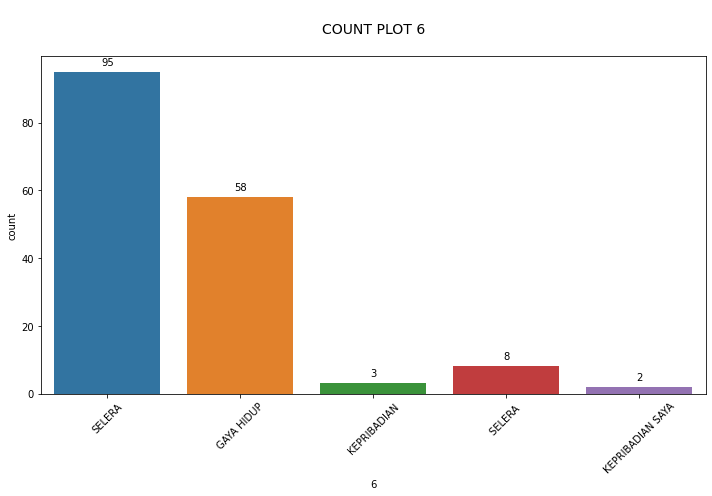

In [ ]:
kolom = df.columns
plt.clf()

# Membuat plot untuk setiap kolom
for kol in kolom:  
    # Membuat Plot
    plt.figure(figsize=(10,7))
    splot = sns.countplot(x=kol, data = df)
    plt.title('\nCOUNT PLOT %s\n'%(kol), fontsize=14)
    plt.xticks(rotation=45)    

    # membuat anotasi
    for p in splot.patches:
      splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

# Data Cleansing #2

Setelah melihat data dengan visualisasi, ternyata ada beberapa data yang duplikasi. Seperti kolom '1' dan kolom '6' dimana jawaban YA divisualisasi berbeda sehingga membuat kategori baru. Kemudian jawaban kolom '6' ada jawaban 'KEPRIBADIAN SAYA' dan 'KEPRIBADIAN' yang keduanya seharusnya sama, dan beberapa data yang lain. Oleh karena itu diperlukan perbaikan data. 

In [ ]:
# memperbaiki data pada kolom pengeluaran

df.loc[df['PENDAPATAN'] == '1.500.000-2.000,000']
df.loc[[22,26,29,33,131,135],['PENDAPATAN']]= '1.500.000-2.000.000'

df.loc[df['PENDAPATAN'] == '500.000-100.000']
df.loc[[118],['PENDAPATAN']]= '500.000-1.000.000'

df[['PENDAPATAN']].value_counts()

PENDAPATAN         
>2.000.000             73
1.500.000-2.000.000    29
<500.000               24
1.000.000-1.500.000    24
500.000-1.000.000      16
dtype: int64

In [ ]:
# memperbaiki data pada kolom 'PENGELUARAN' 

df.loc[df['PENGELUARAN'] == '1.500.000-2.000,000']
df.loc[[22,26,29,33],['PENGELUARAN']]= '1.500.000-2.000.000'

df.loc[df['PENGELUARAN'] == '500.000-100.000']
df.loc[[118],['PENGELUARAN']]= '500.000-1.000.000'

df.loc[df['PENGELUARAN'] == '<500,000']
df.loc[[113],['PENGELUARAN']]= '<500.000'

df[['PENGELUARAN']].value_counts()



PENGELUARAN        
>2.000.000             72
1.500.000-2.000.000    27
1.000.000-1.500.000    25
<500.000               22
500.000-1.000.000      20
dtype: int64

In [ ]:
# memperbaiki data pada kolom '1'

df.loc[df['1'] == 'YA ']
df.loc[77,['1']]= 'YA'
df[['1']].value_counts()


1    
YA       135
TIDAK     31
dtype: int64

In [ ]:
# memperbaiki data pada kolom '2'

df.loc[df['2'] == 'YA ']
df.loc[77,['2']] ='YA'
df[['2']].value_counts()

2    
YA       137
TIDAK     29
dtype: int64

In [ ]:
# memperbaiki data pada kolom '4'
df.loc[df['4'] == 'PROUDK SESUAI KEBUTUHAN']
df.loc[[64,162],['4']] ='PRODUK SESUAI KEBUTUHAN'
df[['4']].value_counts()


4                      
PRODUK SESUAI KEBUTUHAN    87
PRODUK MEMILIKI MANFAAT    42
PRODUK MURAH               34
MURAH                       2
LAINNYA                     1
dtype: int64

In [ ]:
# memperbaiki data pada kolom '6'

df.loc[df['6'] == 'KEPRIBADIAN SAYA']
df.loc[[75,94],['6']] ='KEPRIBADIAN'
df[['6']].value_counts()

6          
SELERA         95
GAYA HIDUP     58
SELERA          8
KEPRIBADIAN     5
dtype: int64

# Data Visualisasi #2

<Figure size 432x288 with 0 Axes>

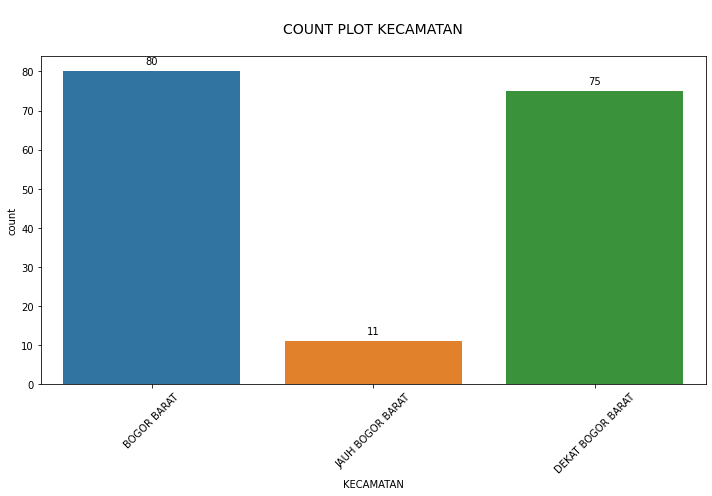

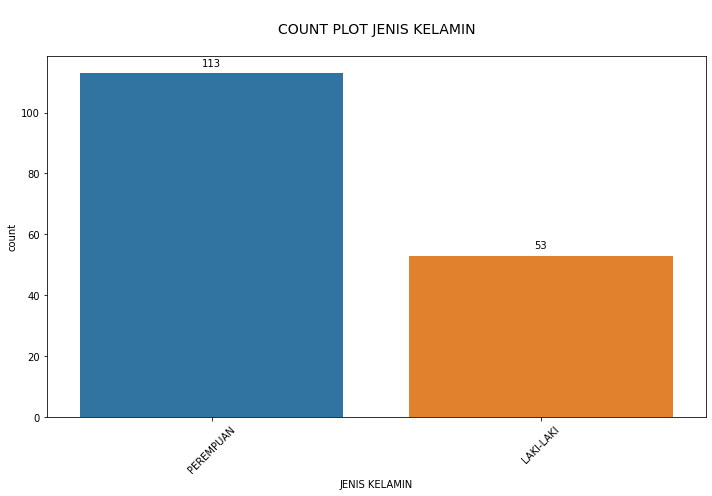

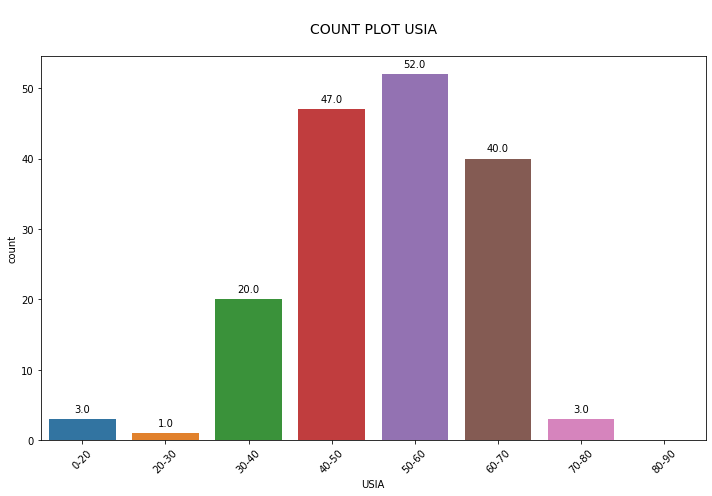

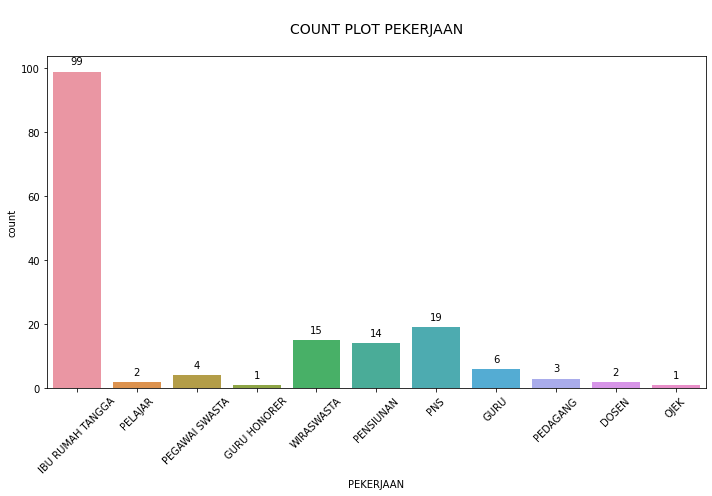

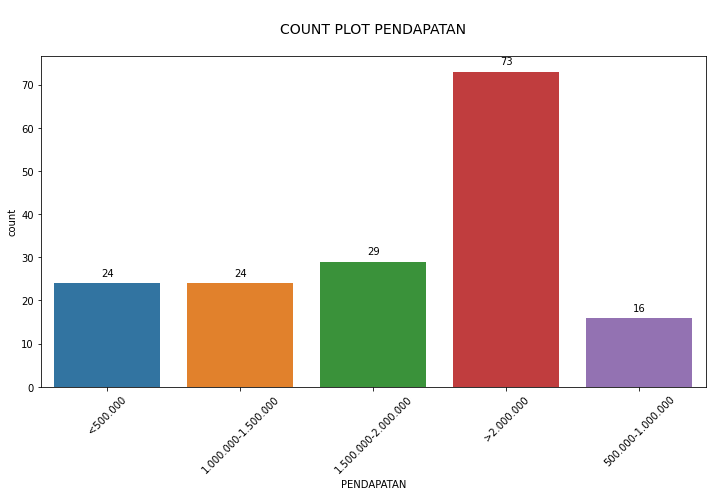

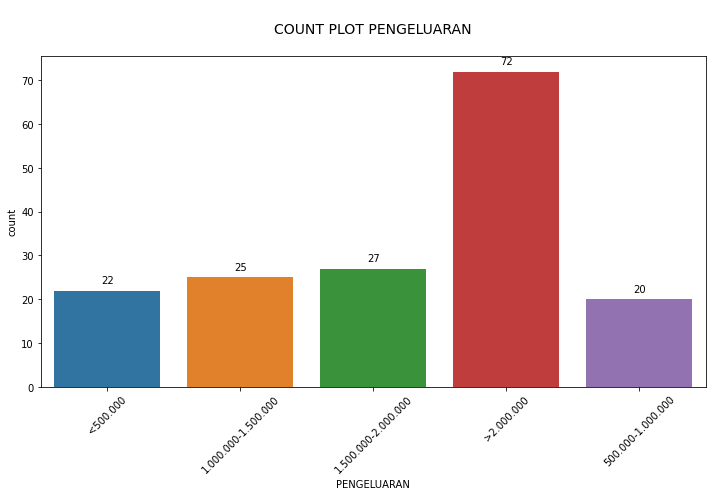

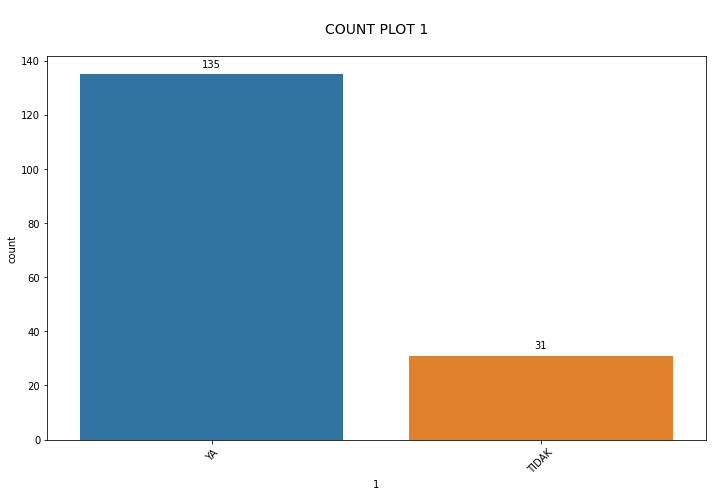

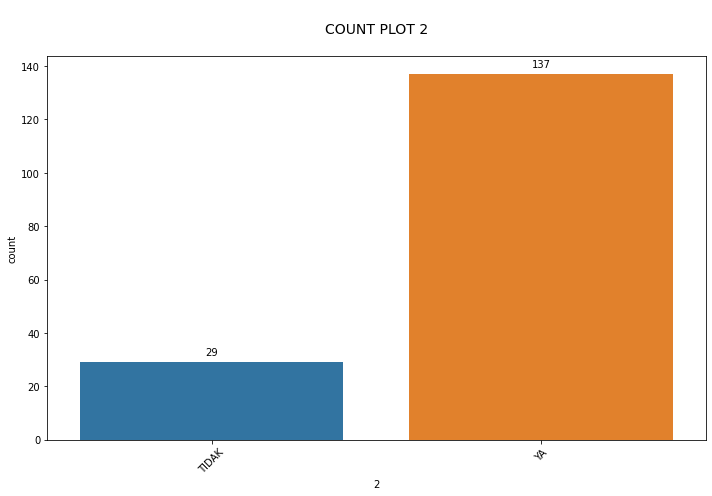

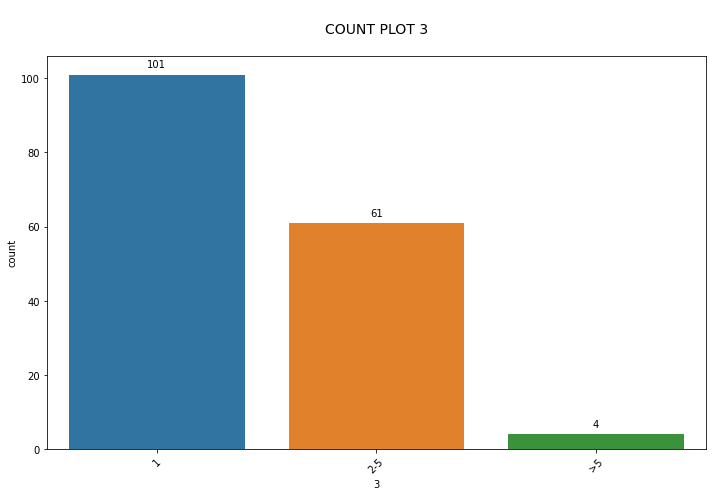

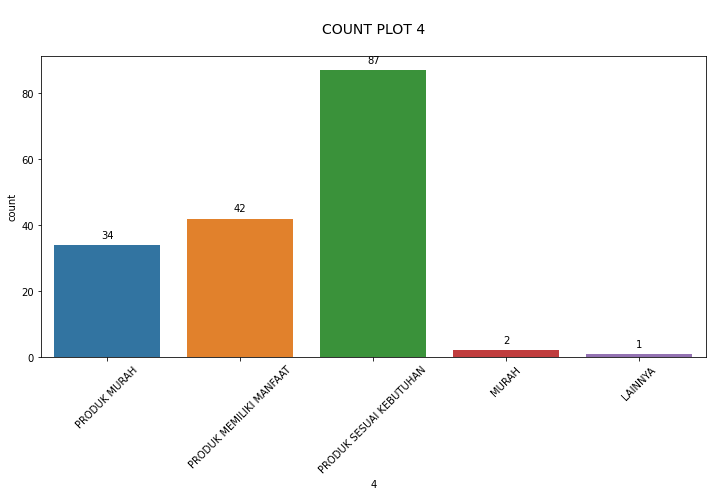

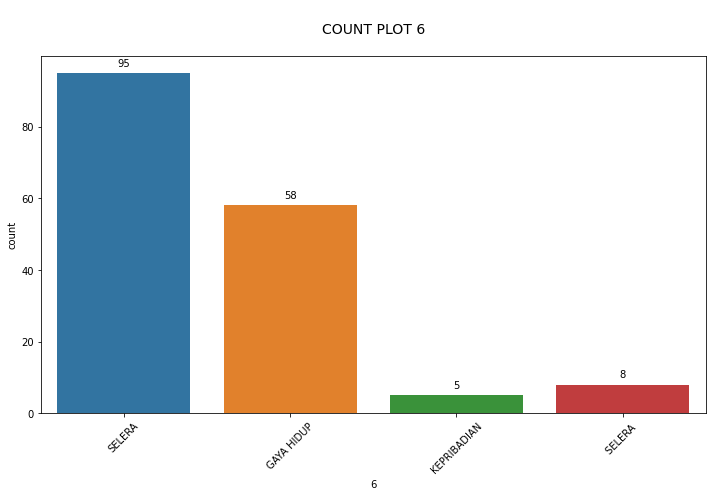

In [ ]:
kolom = df.columns
plt.clf()

# Membuat plot untuk setiap kolom
for kol in kolom:  
    # Membuat Plot
    plt.figure(figsize=(10,7))
    splot = sns.countplot(x=kol, data = df)
    plt.title('\nCOUNT PLOT %s\n'%(kol), fontsize=14)
    plt.xticks(rotation=45)    

    # membuat anotasi
    for p in splot.patches:
      splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', 
                     va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

    plt.tight_layout()
    plt.show()

# 4. KLASTERISASI

Setelah selesai dengan persiapan data, maka langkah selanjutnya adalah membuat model klasterisasi untuk mengelompokkan atau mensegmentasikan konsumen yang ada pada data. dengan menggunakan K-Modes.

K-Modes merupakan salah satu metode unsupervised machine learning untuk melakukan klasterisasi dengan data kategorikal. Alih-alih menggunakan K-Means yang digunakan untuk klasterisasi data numerikal.

# Konversi Data Kategorikal

Sebelum memulai pemodelan, langkah pertama adalah mengkonversi data menjadi angka dengan LabelEncoder dari library scikit learn.


In [ ]:
# mengimport LabelEncoder dari library scikit-learn
from sklearn.preprocessing import LabelEncoder

#membuat salinan data frame untuk digunakan dalam pemodelan dengan nama df_model
df_model = df.copy()

#mengkonversikan data dengan LabelEncoder
for kol in kolom:  
   df_model[kol]= LabelEncoder().fit_transform(df_model[kol])
      
# Menampilkan data  
print(df_model.head())


   KECAMATAN  JENIS KELAMIN  USIA  PEKERJAAN  PENDAPATAN  ...  1  2  3  4  6
0          0              1     2          3           3  ...  1  0  0  3  2
1          0              1     0          7           0  ...  1  1  0  2  2
2          0              1     2          3           1  ...  1  1  0  4  2
3          2              1     2          6           4  ...  0  0  0  4  0
4          2              1     2          3           2  ...  0  1  0  2  0

[5 rows x 11 columns]


# Import KModes

Setelah melakukan konversi, kemudian mengolah data dengan K-Modes. Sebelum menggunakan K-Modes, terlebih dahulu untuk menginstall library kmodes terlebih dahulu. Kemudian melakukan pemodelan KModes.

In [ ]:
#menginstall library kmodes

! pip install kmodes


In [ ]:
#menggunakan Kmodes untuk permodelan

from kmodes.kmodes import KModes

# Mengetahui Jumlah Cluster yang Optimal 

Sebelum data dimasukkan ke cluster, diperlukan jumlah cluster yang optimal, Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat di buat dengan cara  memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

In [ ]:
#melakukan iterasi untuk mendapatkan nilai cost

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_model)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 782.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 693.0
Run 1, iteration: 2/100, moves: 9, cost: 693.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25, cost: 660.0
Run 1, iteration: 2/100, moves: 6, cost: 660.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 21, cost: 626.0
Run 1, iteration: 2/100, moves: 4, cost: 626.0


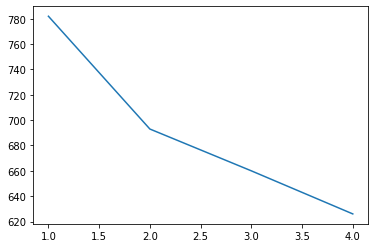

In [ ]:
# melakukan visualisasi elbow plot

import numpy as np
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

Didapatkan nilai 2 untuk jumlah klaster yang digunakan.

# Melakukan Klasterisasi
Langkah Selanjutnya adalah menggunakan KModes untuk permodelan


In [ ]:
# membuat model

km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_model)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 16, cost: 693.0
Run 1, iteration: 2/100, moves: 9, cost: 693.0


In [ ]:
#print cluster

fitClusters_cao

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0], dtype=uint16)

Setelah mengetahui masing-masing data masuk kedalam cluster apa saja, maka selanjutnya menggabungkan kluster dengan data awal. 

In [ ]:
#Combining the predicted clusters with the original DF

df = df.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(columns=['level_0','index'])



In [ ]:
# info mengenai dataset terbaru yang sudah ditambahkan cluster

combinedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   KECAMATAN          166 non-null    object  
 1   JENIS KELAMIN      166 non-null    object  
 2   USIA               166 non-null    category
 3   PEKERJAAN          166 non-null    object  
 4   PENDAPATAN         166 non-null    object  
 5   PENGELUARAN        166 non-null    object  
 6   1                  166 non-null    object  
 7   2                  166 non-null    object  
 8   3                  166 non-null    object  
 9   4                  166 non-null    object  
 10  6                  166 non-null    object  
 11  cluster_predicted  166 non-null    uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 14.0+ KB


In [ ]:
#info data berdasarkan kluster 

cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
print('info_cluster_0') 
print(cluster_0.info())
print('\ninfo_cluster_1')
print(cluster_1.info())

info_cluster_0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 165
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   KECAMATAN          125 non-null    object  
 1   JENIS KELAMIN      125 non-null    object  
 2   USIA               125 non-null    category
 3   PEKERJAAN          125 non-null    object  
 4   PENDAPATAN         125 non-null    object  
 5   PENGELUARAN        125 non-null    object  
 6   1                  125 non-null    object  
 7   2                  125 non-null    object  
 8   3                  125 non-null    object  
 9   4                  125 non-null    object  
 10  6                  125 non-null    object  
 11  cluster_predicted  125 non-null    uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 11.5+ KB
None

info_cluster_1
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 33 to 161
Data columns (total 12 columns):
 #

# Visualisasi Setelah Klasterisasi


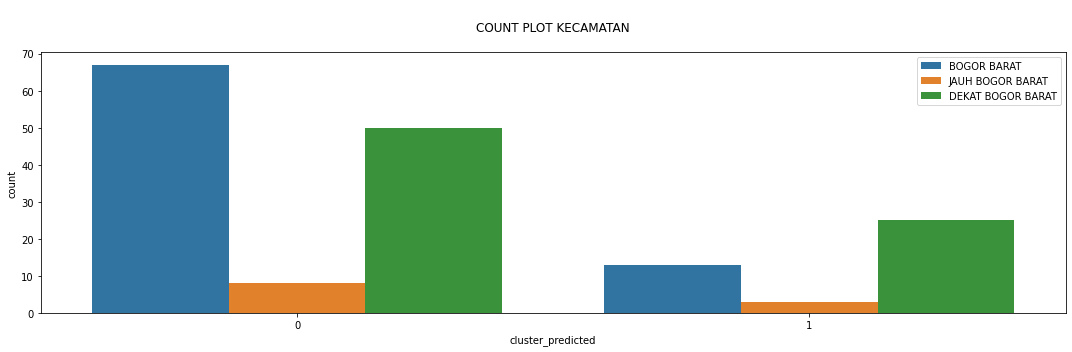

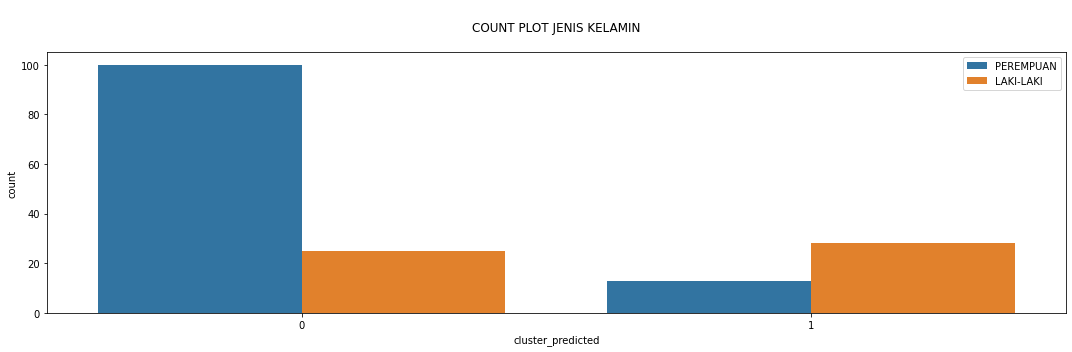

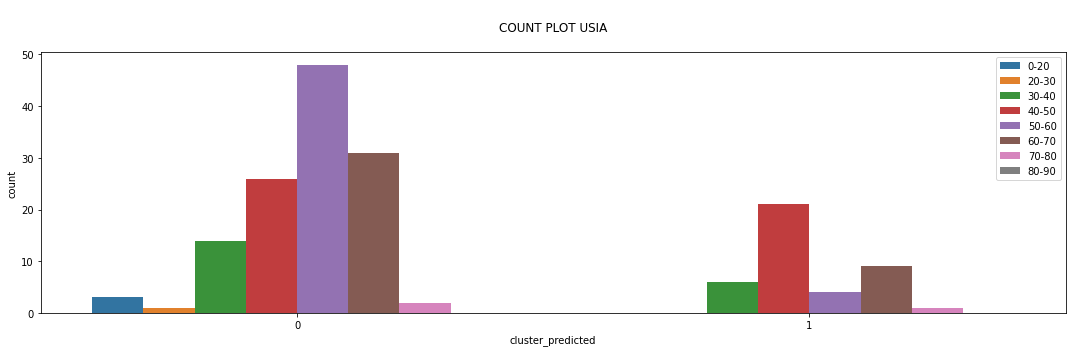

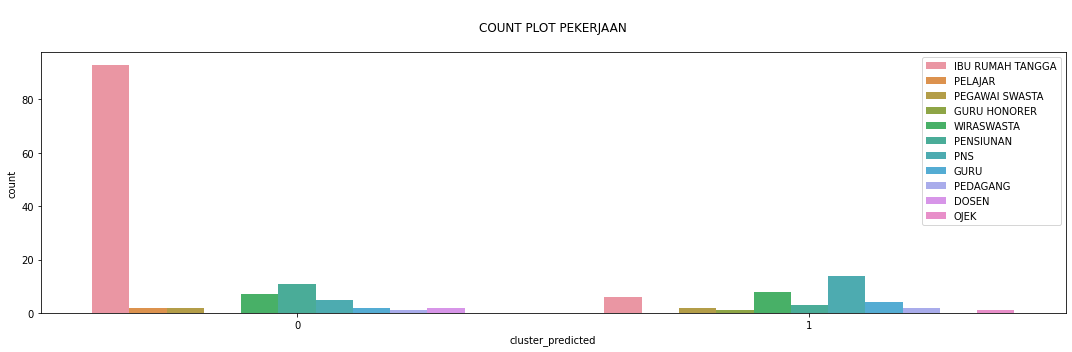

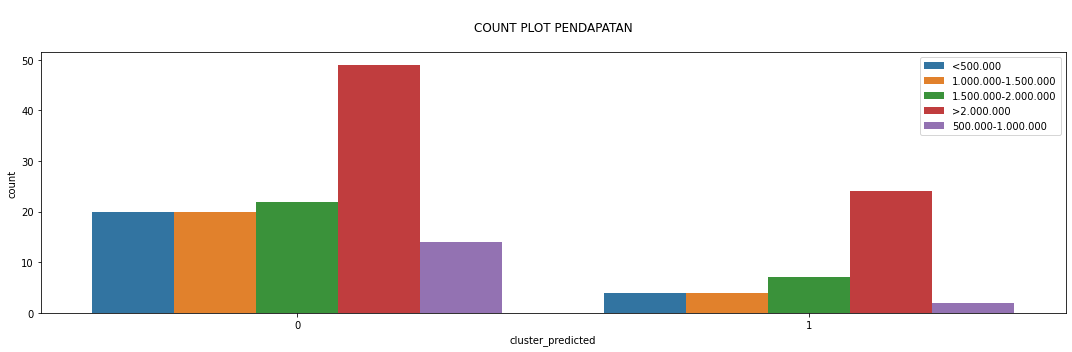

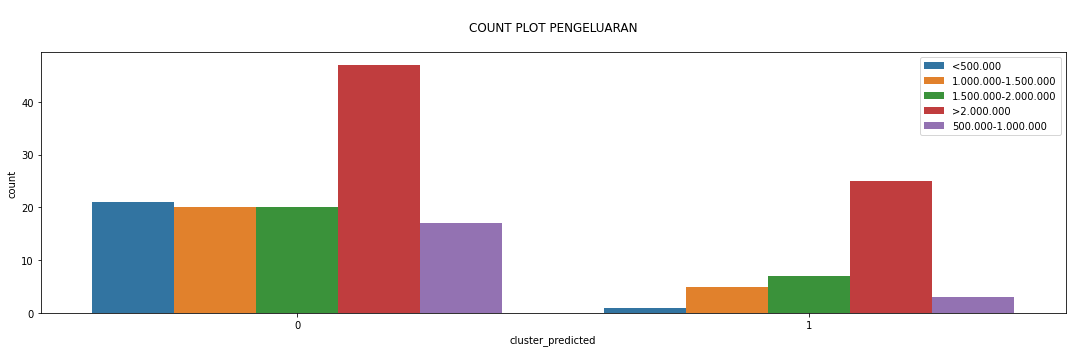

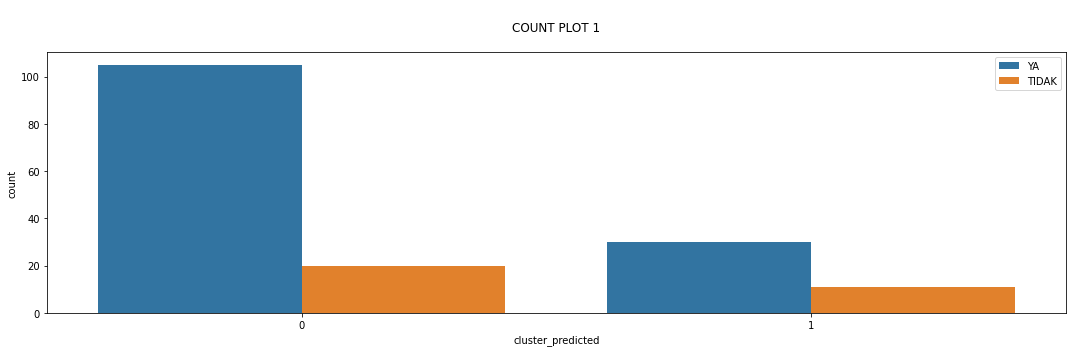

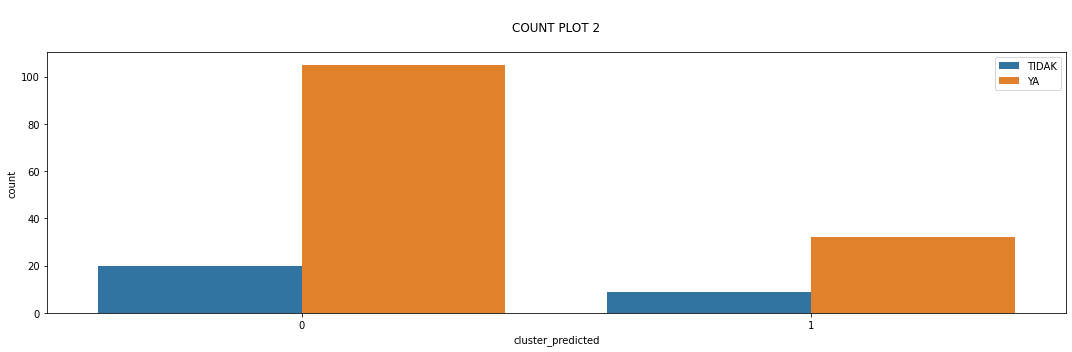

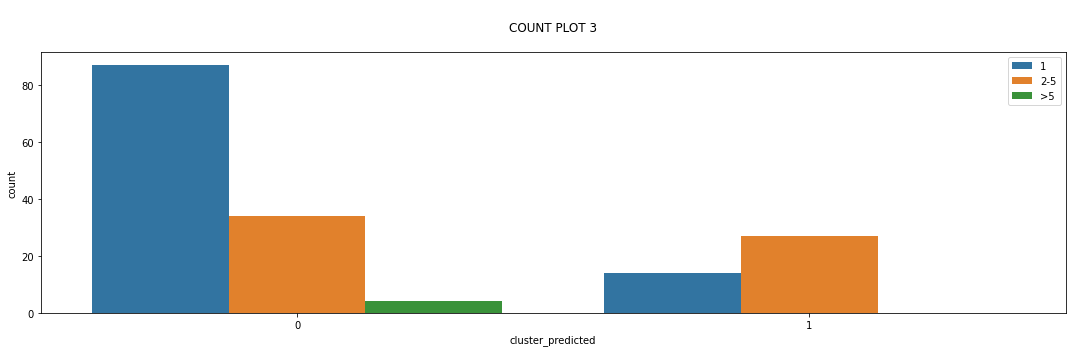

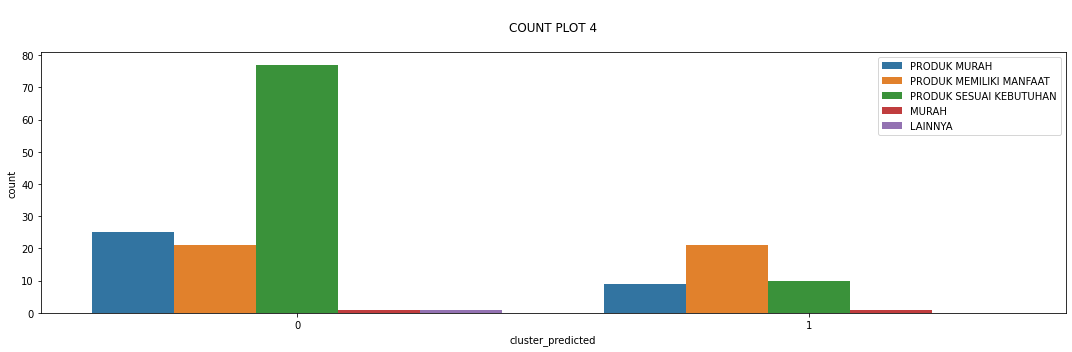

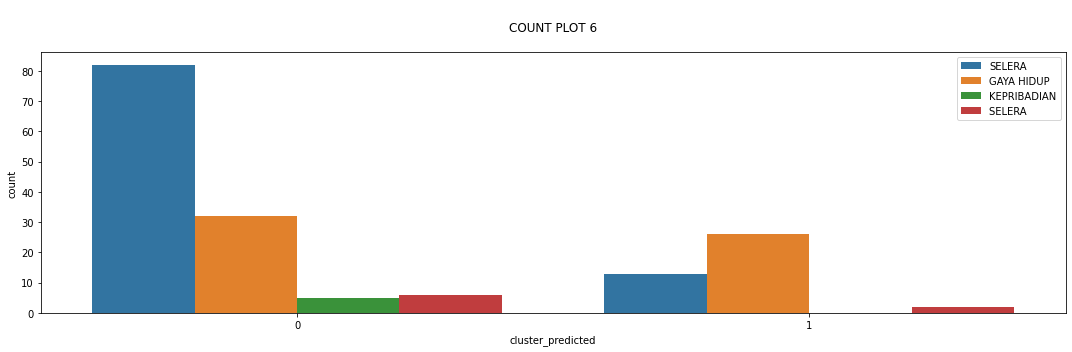

In [ ]:
kolom = combinedDf.iloc[:,:-1]

# Membuat plot untuk setiap kolom kategorikal  
for kol in kolom:  
    # Membuat Plot
    plt.subplots(figsize = (15,5))
    sns.countplot(x=combinedDf['cluster_predicted'], data = combinedDf,
                  hue=kol)
    plt.title('\nCOUNT PLOT {}\n'.format(kol), fontsize=12)
    plt. legend (loc='upper right')  
    plt.tight_layout()
    plt.show()

# Penamaan Cluster
Dari hasil observasi, kemudian menamakan setiap kluster sebagai berikut:

Cluster 0: merupakan masyarakat kecamatan bogor barat dengan pembelian produk 1 dalam seminggu dan menitikberatkan produk sesuai kebutuhan.

Cluster 1: merupakan masyarakat kecamatan yang berada disekitar kecamatan bogor barat dan pembelian produk anatar 2-5  produk dalam seminggu dan menitikberatkan kebermanfaatan produk.